# **1. Perkenalan Dataset**


# 📚 Extrovert vs. Introvert Behavior Data

**Sumber**: [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data) (Kaggle)

## Overview
Dataset ini merupakan kumpulan data perilaku dan sosial yang kaya untuk menjelajahi spektrum kepribadian manusia, khususnya antara **extrovert** dan **introvert**. Cocok digunakan oleh psikolog, peneliti sosial, dan data scientist untuk studi perilaku, prediksi kepribadian, atau eksperimen preprocessing data.

## Context
Ciri kepribadian seperti extroversion dan introversion memengaruhi cara seseorang berinteraksi dengan lingkungan sosialnya. Dataset ini menangkap berbagai indikator seperti:
- Waktu yang dihabiskan sendiri
- Frekuensi menghadiri acara sosial
- Aktivitas di media sosial

## Isi Dataset
- **Fitur numerik** terkait perilaku sosial (misalnya jumlah teman dekat, frekuensi hadir di acara sosial, waktu di luar rumah, aktivitas unggahan di media sosial).
- **Label target**: klasifikasi kepribadian sebagai **extrovert** atau **introvert**, biasanya berupa kategori biner berdasarkan kuesioner atau skala psikologis.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../personality/personality_datasert.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(402)

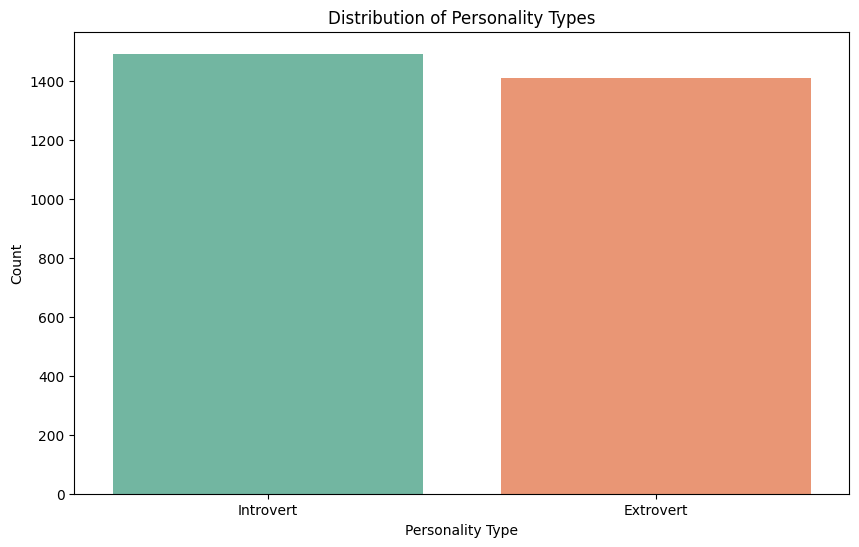

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Personality', data=df, palette='Set2', hue='Personality')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

In [8]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df["Stage_fear"] = df["Stage_fear"].map({"Yes": 1, "No": 0})
df["Drained_after_socializing"] = df["Drained_after_socializing"].map({"Yes": 1, "No": 0})
df["Personality"] = df["Personality"].map({"Extrovert": 1, "Introvert": 0})

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [11]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Personality')

ss = StandardScaler()
df[numeric_features] = ss.fit_transform(df[numeric_features])

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.068154,-0.880573,-0.069897,1.265368,-0.879141,1.508193,0.406606,1
1,1.399866,1.135624,-1.461817,-1.439329,1.137474,-1.545842,-0.279813,0
2,1.399866,1.135624,-1.113837,-0.537763,1.137474,-0.371213,-0.623023,0
3,-1.242570,-0.880573,0.626062,1.716151,-0.879141,1.743119,1.436236,1
4,-0.361758,-0.880573,1.670001,0.363802,-0.879141,0.333564,0.406606,1


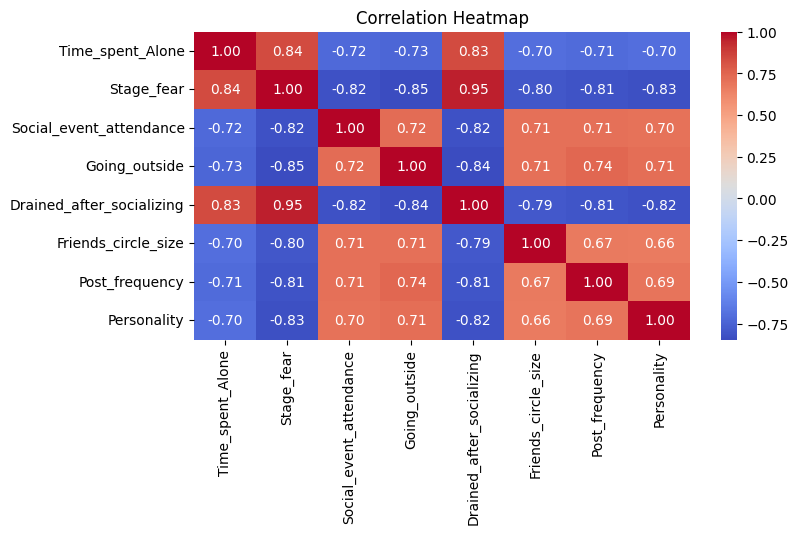

In [12]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

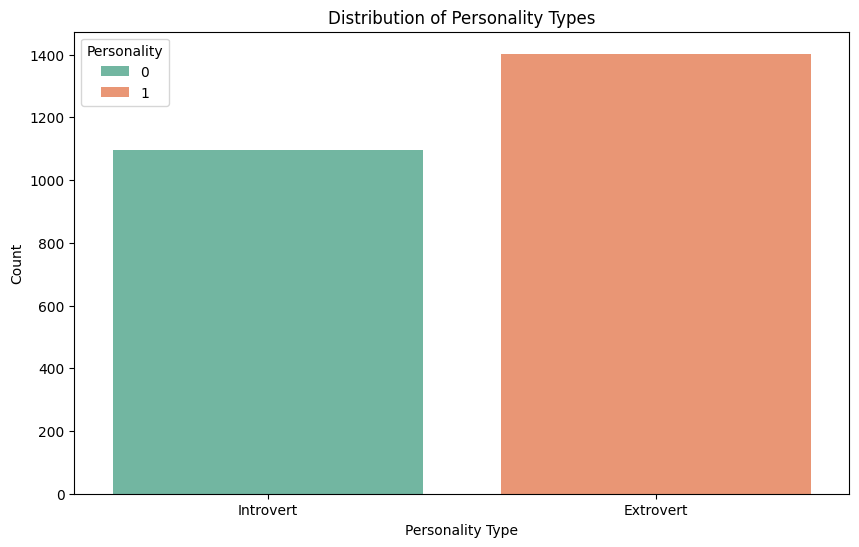

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Personality', data=df, palette='Set2', hue='Personality')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

<Figure size 1000x600 with 0 Axes>

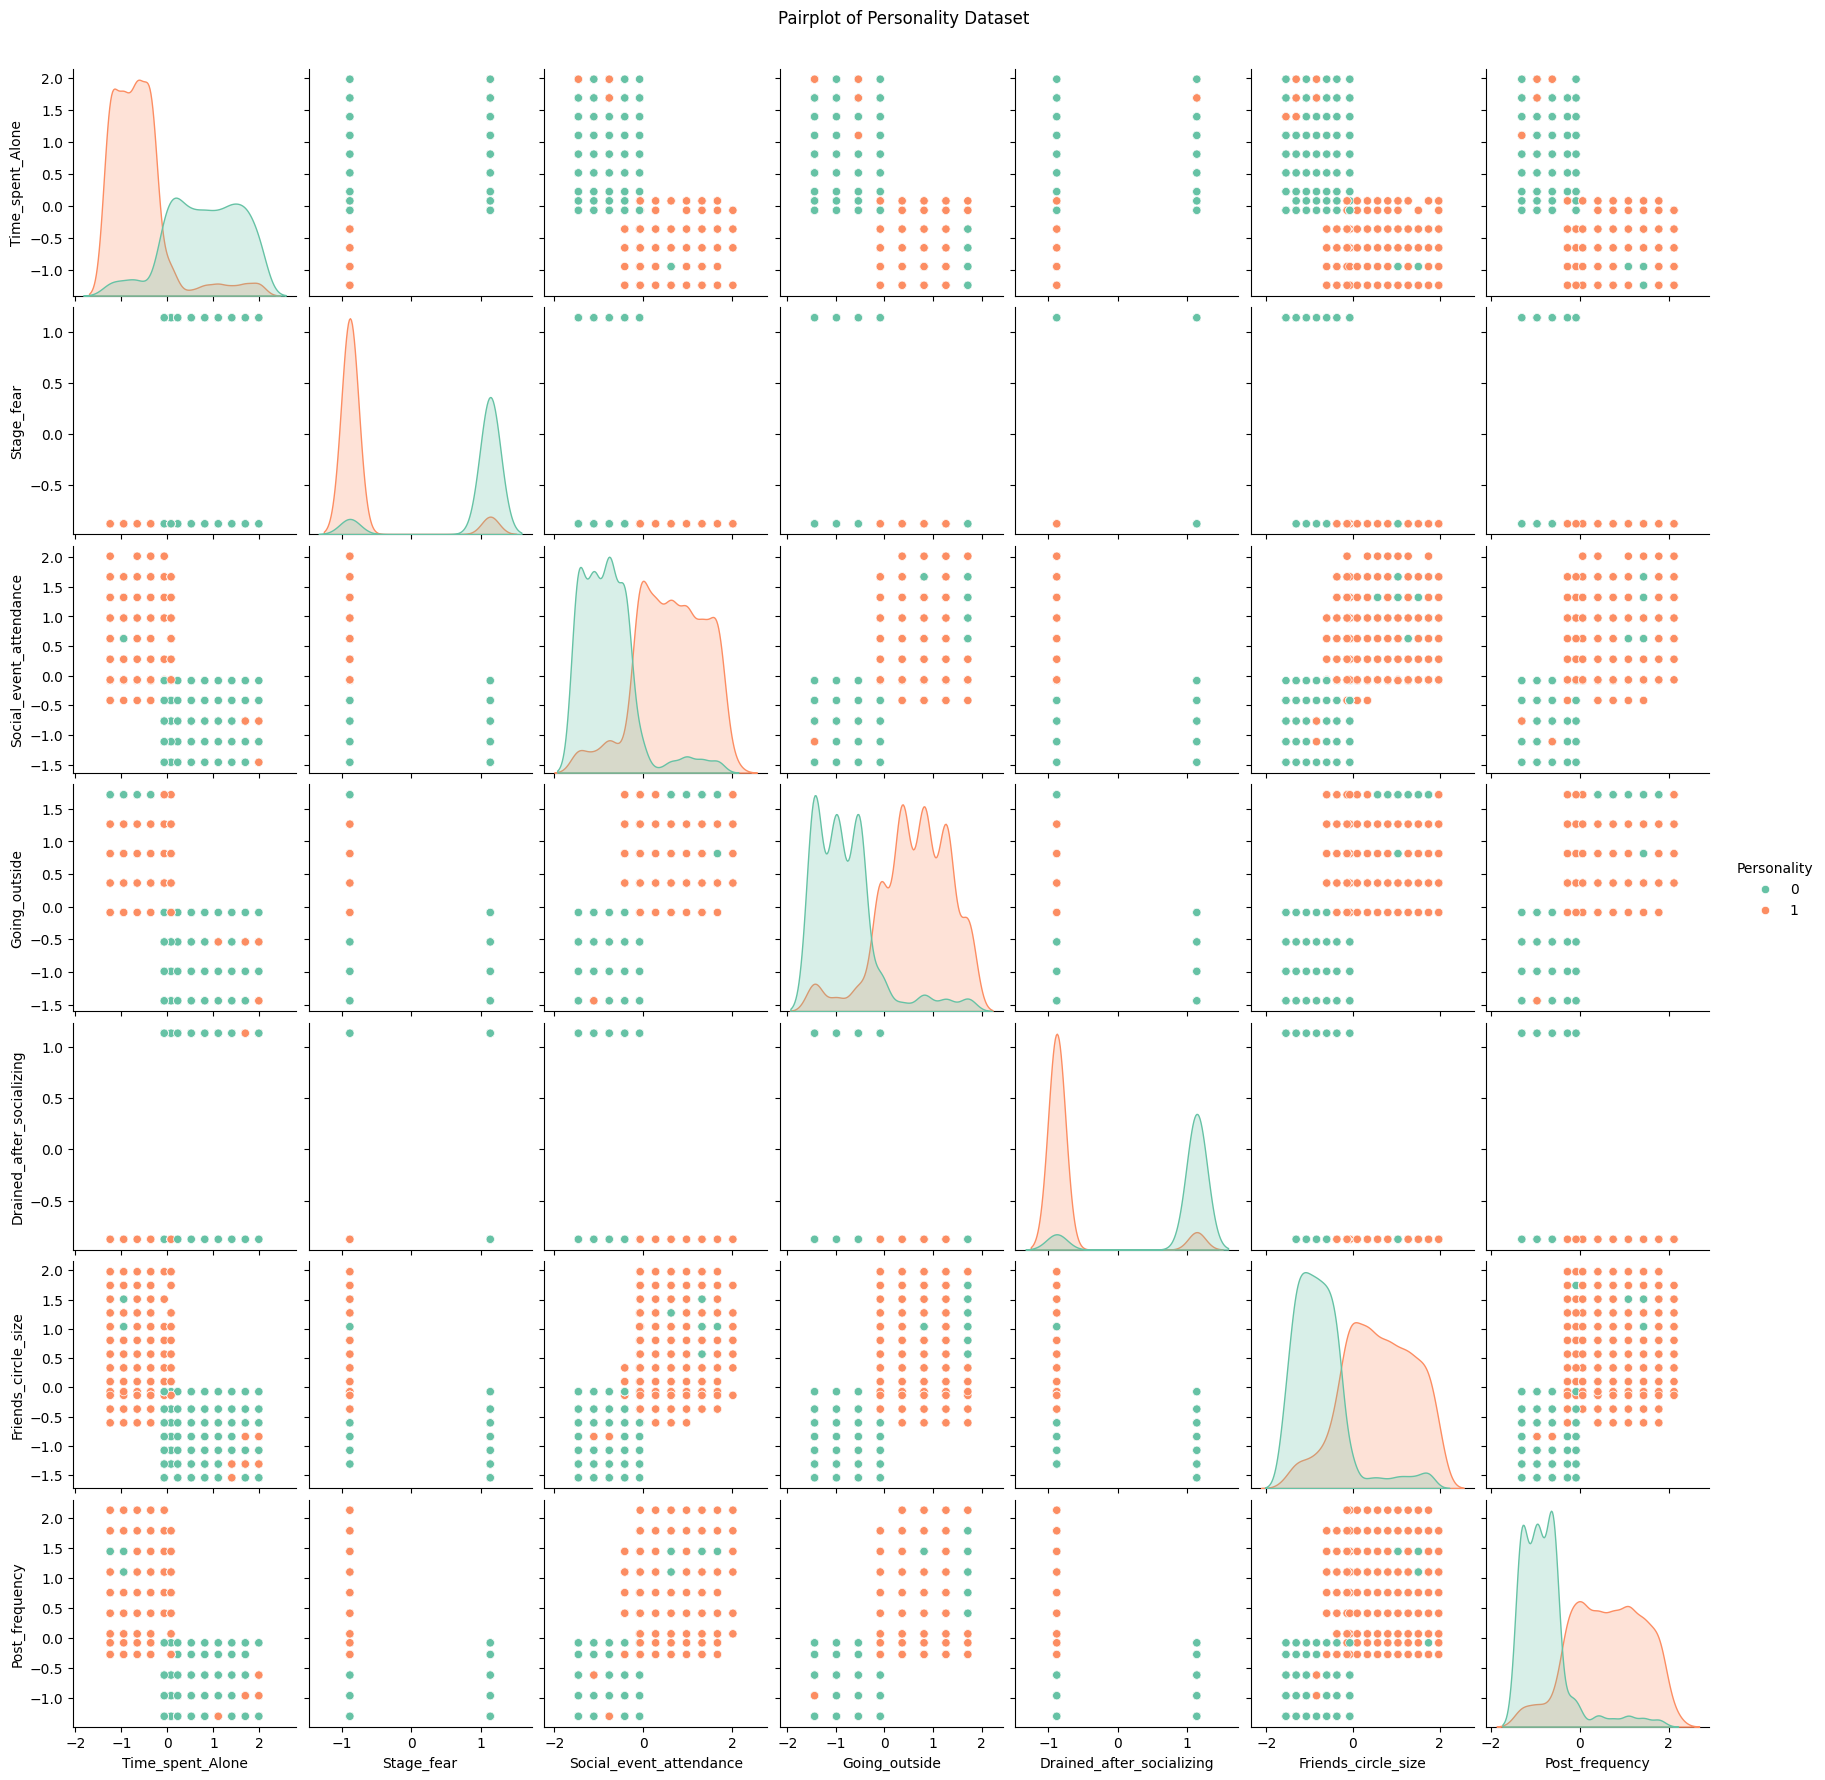

In [14]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Personality', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Personality Dataset', y=1.02)
plt.show()

In [15]:
X = df.drop(columns=['Personality'])
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1998, 7), (500, 7), (1998,), (500,))